In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [3]:
import pandas as pd

In [4]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/mr.csv', encoding='unicode_escape', header=0)
#df.drop(['Cleanedreview'],axis=1,inplace=True)
#df.to_csv('mr/train-sst5.csv', index=False)
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('mr/train-mr.csv', index=False)
test.to_csv('mr/test-mr.csv', index=False)

In [5]:
train_df = pd.read_csv("mr/train-mr.csv", encoding='unicode_escape', header=0)

In [6]:
train_df

,sentiment,review
0,1,the magic of the film lies not in the mysterio...
1,1,morvern callar confirms lynne ramsay as an imp...
2,1,'writer-director's mehta's effort has tons of ...
3,1,this is art paying homage to art .
4,1,is this love or is it masochism ? binoche make...
...,...,...
9427,0,'there is an almost poignant dimension to the ...
9428,1,"'light , cute and forgettable . '"
9429,1,'the movie ultimately relies a bit too heavily...
9430,0,these people wouldn't know subtle characteriza...


In [7]:
train_df.iloc[0][1]

C:\Users\huyen\AppData\Local\Temp\ipykernel_3224\1864895821.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_df.iloc[0][1]


'the magic of the film lies not in the mysterious spring but in the richness of its performances . '

In [8]:
test_df = pd.read_csv("mr/test-mr.csv", encoding='unicode_escape', header=0)

In [9]:
test_df.shape

(1048, 2)

In [10]:
test_df.head()

,sentiment,review
0,1,"'the movie is amateurish , but it's a minor tr..."
1,1,absorbing character study by andr? turpin .
2,1,a film of precious increments artfully camoufl...
3,1,'for those who are intrigued by politics of th...
4,1,the first half bursts with a goofy energy prev...


In [11]:
test_df

,sentiment,review
0,1,"'the movie is amateurish , but it's a minor tr..."
1,1,absorbing character study by andr? turpin .
2,1,a film of precious increments artfully camoufl...
3,1,'for those who are intrigued by politics of th...
4,1,the first half bursts with a goofy energy prev...
...,...,...
1043,0,a trite psychological thriller designed to kee...
1044,0,"fails as a dystopian movie , as a retooling of..."
1045,0,bearable . barely .
1046,0,reeboir varies between a sweet smile and an an...


In [12]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,1,the magic of the film lies not in the mysterio...
1,1,1,morvern callar confirms lynne ramsay as an imp...
2,2,1,'writer-director's mehta's effort has tons of ...
3,3,1,this is art paying homage to art .
4,4,1,is this love or is it masochism ? binoche make...


In [13]:
train_df_bert

,id,label,sentence
0,0,1,the magic of the film lies not in the mysterio...
1,1,1,morvern callar confirms lynne ramsay as an imp...
2,2,1,'writer-director's mehta's effort has tons of ...
3,3,1,this is art paying homage to art .
4,4,1,is this love or is it masochism ? binoche make...
...,...,...,...
9427,9427,0,'there is an almost poignant dimension to the ...
9428,9428,1,"'light , cute and forgettable . '"
9429,9429,1,'the movie ultimately relies a bit too heavily...
9430,9430,0,these people wouldn't know subtle characteriza...


In [14]:
train_df_bert = train_df_bert.iloc[0:10000]

In [15]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,1,"'the movie is amateurish , but it's a minor tr..."
1,1,1,absorbing character study by andr? turpin .
2,2,1,a film of precious increments artfully camoufl...
3,3,1,'for those who are intrigued by politics of th...
4,4,1,the first half bursts with a goofy energy prev...


In [16]:
test_df_bert = test_df_bert.iloc[0:3000]

In [17]:
test_df_bert

,id,label,sentence
0,0,1,"'the movie is amateurish , but it's a minor tr..."
1,1,1,absorbing character study by andr? turpin .
2,2,1,a film of precious increments artfully camoufl...
3,3,1,'for those who are intrigued by politics of th...
4,4,1,the first half bursts with a goofy energy prev...
...,...,...,...
1043,1043,0,a trite psychological thriller designed to kee...
1044,1044,0,"fails as a dystopian movie , as a retooling of..."
1045,1045,0,bearable . barely .
1046,1046,0,reeboir varies between a sweet smile and an an...


In [18]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [19]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [20]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [25]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  morvern callar confirms lynne ramsay as an important , original talent in international cinema . 
Tokenized:  ['mor', '##vern', 'call', '##ar', 'confirms', 'lynne', 'ramsay', 'as', 'an', 'important', ',', 'original', 'talent', 'in', 'international', 'cinema', '.']
Token IDs:  [22822, 23062, 2655, 2906, 23283, 26938, 19460, 2004, 2019, 2590, 1010, 2434, 5848, 1999, 2248, 5988, 1012]


In [26]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:
    #sent=str(sent)

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  81


In [27]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:
    #sent=str(sent)

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  75


In [28]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    #sent=str(sent)
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 60,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  the magic of the film lies not in the mysterious spring but in the richness of its performances . 
Token IDs: tensor([ 101, 1996, 3894, 1997, 1996, 2143, 3658, 2025, 1999, 1996, 8075, 3500,
        2021, 1999, 1996, 4138, 2791, 1997, 2049, 4616, 1012,  102,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])


In [29]:

train_df_bert.head()

,id,label,sentence
0,0,1,the magic of the film lies not in the mysterio...
1,1,1,morvern callar confirms lynne ramsay as an imp...
2,2,1,'writer-director's mehta's effort has tons of ...
3,3,1,this is art paying homage to art .
4,4,1,is this love or is it masochism ? binoche make...


In [30]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [31]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [32]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (9432, 60)
X_test shape: (1048, 60)


In [34]:
#FLeCLwoFD
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32
nb_classes = 5
filters = 32
kernel_size = 3
hidden_dims = 40
#input_shape=x_train.shape
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))

model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 32)            64000     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 60, 32)            5152      
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 60, 32)            4128      
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 60, 32)            3104      
_________________________________________________________________
dropout_7 (Dropout)          (None, 60,

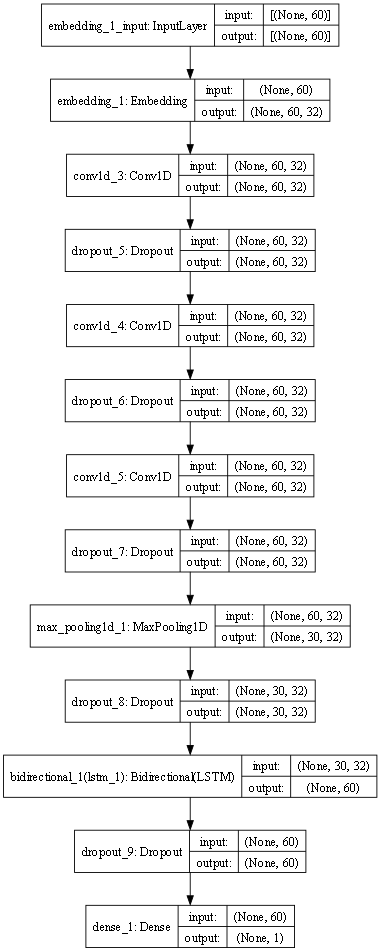

In [35]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [36]:
import keras
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20, 
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
849/849 [==============================] - 19s 15ms/step - loss: 0.6118 - accuracy: 0.6504 - val_loss: 0.5760 - val_accuracy: 0.7140
Epoch 2/20
849/849 [==============================] - 11s 13ms/step - loss: 0.4468 - accuracy: 0.7957 - val_loss: 0.5689 - val_accuracy: 0.7097
Epoch 3/20
849/849 [==============================] - 11s 13ms/step - loss: 0.3727 - accuracy: 0.8389 - val_loss: 0.5923 - val_accuracy: 0.7182
Epoch 4/20
849/849 [==============================] - 11s 13ms/step - loss: 0.3106 - accuracy: 0.8682 - val_loss: 0.6446 - val_accuracy: 0.7225
Epoch 5/20
295/295 [==============================] - 2s 6ms/step - loss: 0.2840 - accuracy: 0.8867
Training Accuracy: 0.886662
Training Loss: 0.284039
33/33 [==============================] - 0s 5ms/step - loss: 0.7183 - accuracy: 0.7099
Testing Accuracy:  0.709924
Testing Loss:  0.718283


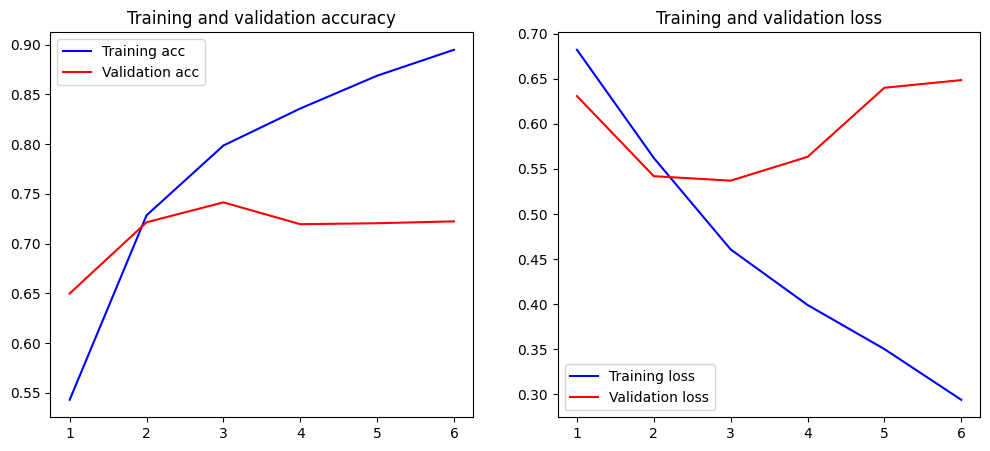

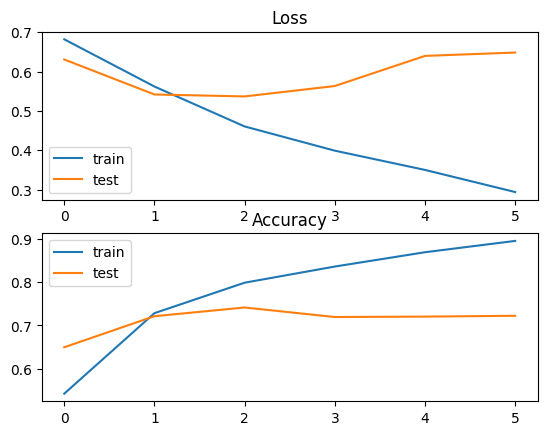

In [139]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()